Install additional libraries from pip using requirements.txt

In [1]:
import sys
# !{sys.executable} -m pip install -r requirements.txt
# !python --version
# !python -m pip install -r requirements.txt
print("requirements installed \n running program...")



requirements installed 
 running program...


In [2]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os


# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns 

windows_dir = "../kaggle/all/"
ubuntu_dir = "/home/prof/kaggle/unbankedcredit/kaggle/all/"

import platform

system = platform.system()

print("Notebook is running on operating system: {}".format(system))
if system == "Linux":
    directory = ubuntu_dir
else:
    directory = windows_dir


Notebook is running on operating system: Linux


In [3]:
# List files available

print(os.listdir(directory))


['sample_submission.csv', 'application_test.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'HomeCredit_columns_description.csv', 'bureau.csv', 'application_train.csv', 'credit_card_balance.csv', 'bureau_balance.csv']


In [4]:
# Training data
app_train_file = "{}application_train.csv".format(directory)
app_train = pd.read_csv(app_train_file)
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                             0                0   
1             ...                             0                0   
2             ...                             0                0   
3             ...                             0                0   
4             ...                             0                0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        NaN   
4                0                0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       NaN                         NaN   
4                       0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 122 columns]

In [5]:
app_test_file = "{}application_test.csv".format(directory)

app_test = pd.read_csv(app_test_file)
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

              ...             FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                            0                0   
1             ...                            0                0   
2             ...                            0                0   
3             ...                            0                0   
4             ...                            0                0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        0.0   
4                0                0                        NaN   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        NaN                         NaN   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        1.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         0.0  
1                         3.0  
2                         4.0  
3                         3.0  
4                         NaN  

[5 rows x 121 columns]

# Metric: ROC AUC
ie the true positive rate verus the false positive rate
Data is unbalanced with the majority of borrowers not defaulting

In [6]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

282686 Non-defaulting (0)
24825 Defaulting (1)


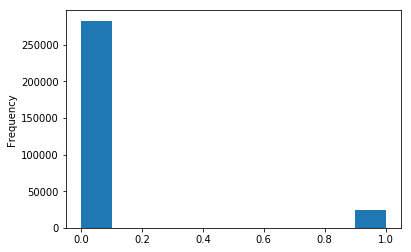

In [8]:
app_train['TARGET'].astype(int).plot.hist()

24825 loans have defaulted

In [9]:
app_train[app_train['TARGET'] == 1].head()



SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

               ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0              ...                             0                0   
26             ...                             0                0   
40             ...                             0                0   
42             ...                             0                0   
81             ...                             0                0   

   FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                 0                0                        0.0   
26                0                0                        0.0   
40                0                0                        0.0   
42                0                0                        0.0   
81                0                0                        0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
26                       0.0                         0.0   
40                       0.0                         0.0   
42                       0.0                         0.0   
81                       0.0                         0.0   

    AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                         0.0                        0.0   
26                        0.0                        2.0   
40                        2.0                        0.0   
42                        0.0                        0.0   
81                        0.0                        0.0   

    AMT_REQ_CREDIT_BUREAU_YEAR  
0                          1.0  
26                         2.0  
40                         4.0  
42                         2.0  
81                         0.0  

[5 rows x 122 columns]

# Missing Data

In [10]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [11]:
missing_data = missing_values_table(app_train)
missing_data.head(30)

# default_average = app_train[app_train['TARGET'] == 1].mean()


Dataframe has 122 columns.
There are 67 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_MEDI                   214865               69.9
COMMONAREA_AVG                    214865               69.9
COMMONAREA_MODE                   214865               69.9
NONLIVINGAPARTMENTS_MEDI          213514               69.4
NONLIVINGAPARTMENTS_MODE          213514               69.4
NONLIVINGAPARTMENTS_AVG           213514               69.4
FONDKAPREMONT_MODE                210295               68.4
LIVINGAPARTMENTS_MODE             210199               68.4
LIVINGAPARTMENTS_MEDI             210199               68.4
LIVINGAPARTMENTS_AVG              210199               68.4
FLOORSMIN_MODE                    208642               67.8
FLOORSMIN_MEDI                    208642               67.8
FLOORSMIN_AVG                     208642               67.8
YEARS_BUILD_MODE                  204488               66.5
YEARS_BUILD_MEDI                  204488               66.5
YEARS_BUILD_AVG                   204488               66.5
OWN_CAR_AGE                       202929               66.0
LANDAREA_AVG                      182590               59.4
LANDAREA_MEDI                     182590               59.4
LANDAREA_MODE                     182590               59.4
BASEMENTAREA_MEDI                 179943               58.5
BASEMENTAREA_AVG                  179943               58.5
BASEMENTAREA_MODE                 179943               58.5
EXT_SOURCE_1                      173378               56.4
NONLIVINGAREA_MEDI                169682               55.2
NONLIVINGAREA_MODE                169682               55.2
NONLIVINGAREA_AVG                 169682               55.2
ELEVATORS_MEDI                    163891               53.3
ELEVATORS_MODE                    163891               53.3
ELEVATORS_AVG                     163891               53.3

In [12]:
app_train[['SK_ID_CURR', 'TARGET','AMT_GOODS_PRICE']][app_train['AMT_GOODS_PRICE'].isnull()].head()

SK_ID_CURR  TARGET  AMT_GOODS_PRICE
724       100837       0              NaN
5937      106955       0              NaN
6425      107494       0              NaN
6703      107822       0              NaN
7647      108913       0              NaN

# Data Types

In [13]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [14]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0) # 3 Gender types? 

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

XNA and XAP appear to be used as variants for NaN

In [15]:
app_train['CODE_GENDER'].value_counts() # clean up XNA to NaN

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [16]:
app_train[app_train['CODE_GENDER'] == "XNA"]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
35657       141289       0    Revolving loans         XNA            Y   
38566       144669       0    Revolving loans         XNA            N   
83382       196708       0    Revolving loans         XNA            N   
189640      319880       0    Revolving loans         XNA            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657                Y             0          207000.0    382500.0   
38566                Y             2          157500.0    270000.0   
83382                Y             1          135000.0    405000.0   
189640               Y             0          247500.0    540000.0   

        AMT_ANNUITY             ...              FLAG_DOCUMENT_18  \
35657       19125.0             ...                             0   
38566       13500.0             ...                             0   
83382       20250.0             ...                             0   
189640      27000.0             ...                             0   

       FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
35657                 0                0                0   
38566                 0                0                0   
83382                 0                0                0   
189640                0                0                0   

       AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
35657                         0.0                       0.0   
38566                         0.0                       0.0   
83382                         0.0                       0.0   
189640                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
35657                          0.0                        0.0   
38566                          0.0                        3.0   
83382                          0.0                        0.0   
189640                         0.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
35657                         0.0                         1.0  
38566                         0.0                         4.0  
83382                         0.0                         3.0  
189640                        1.0                         6.0  

[4 rows x 122 columns]

In [17]:
app_test = app_test.replace('XNA',np.nan) # replace XNA with NaN
app_train = app_train.replace('XNA',np.nan)
app_test = app_test.replace('XAP',np.nan)# replace XAP with NaN
app_train = app_train.replace('XAP',np.nan)


In [18]:
app_train[app_train['CODE_GENDER'] == "XAP"]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE, NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, FONDKAPREMONT_MODE, HOUSETYPE_MODE, TOTALAREA_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, ...]
Index: []

[0 rows x 122 columns]

Encoding Categorical Variables into one-hot encoding

In [19]:
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [20]:
# one-hot encoding of categorical variables
app_train2 = pd.get_dummies(app_train)
app_test2 = pd.get_dummies(app_test)

print('Training Features shape: ', app_train2.shape)
print('Testing Features shape: ', app_test2.shape)

Training Features shape:  (307511, 241)
Testing Features shape:  (48744, 238)


In [21]:
train_labels = app_train2['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train2, app_test2 = app_train2.align(app_test2, join = 'inner', axis = 1)

# Add the target back in
app_train2['TARGET'] = train_labels

In [22]:
print('Training Features shape: ', app_train2.shape)
print('Testing Features shape: ', app_test2.shape)

Training Features shape:  (307511, 239)
Testing Features shape:  (48744, 238)


In [23]:
# Columns are not the same between training and testing data
print("The difference between app_train and app_test is...")
for col in app_train2:
    if col not in app_test2:
        print(col)

The difference between app_train and app_test is...
TARGET


One-hot encoding has created three new columns that do not match any values in test. NB Target column was never included in Test data.

Test data must not contain any maternity leave as income type or unknown for family status

In [24]:
for col in app_test2:
    if "FAMILY" in col:
        print(col)

NAME_FAMILY_STATUS_Civil marriage
NAME_FAMILY_STATUS_Married
NAME_FAMILY_STATUS_Separated
NAME_FAMILY_STATUS_Single / not married
NAME_FAMILY_STATUS_Widow


In [25]:
for col in app_train2:
    if "FAMILY" in col:
        print(col)

NAME_FAMILY_STATUS_Civil marriage
NAME_FAMILY_STATUS_Married
NAME_FAMILY_STATUS_Separated
NAME_FAMILY_STATUS_Single / not married
NAME_FAMILY_STATUS_Widow


# Anomalies

Examining the data for any anomalous data entries

In [26]:
app_train.describe()
# for col in app_train2:
#     print("{}\n".format(app_train2[col].describe()))

SK_ID_CURR         TARGET  NAME_CONTRACT_TYPE   FLAG_OWN_CAR  \
count  307511.000000  307511.000000       307511.000000  307511.000000   
mean   278180.518577       0.080729            0.095213       0.340108   
std    102790.175348       0.272419            0.293509       0.473746   
min    100002.000000       0.000000            0.000000       0.000000   
25%    189145.500000       0.000000            0.000000       0.000000   
50%    278202.000000       0.000000            0.000000       0.000000   
75%    367142.500000       0.000000            0.000000       1.000000   
max    456255.000000       1.000000            1.000000       1.000000   

       FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count    307511.000000  307511.000000      3.075110e+05  3.075110e+05   
mean          0.693673       0.417052      1.687979e+05  5.990260e+05   
std           0.460968       0.722121      2.371231e+05  4.024908e+05   
min           0.000000       0.000000      2.565000e+04  4.500000e+04   
25%           0.000000       0.000000      1.125000e+05  2.700000e+05   
50%           1.000000       0.000000      1.471500e+05  5.135310e+05   
75%           1.000000       1.000000      2.025000e+05  8.086500e+05   
max           1.000000      19.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE             ...              \
count  307499.000000     3.072330e+05             ...               
mean    27108.573909     5.383962e+05             ...               
std     14493.737315     3.694465e+05             ...               
min      1615.500000     4.050000e+04             ...               
25%     16524.000000     2.385000e+05             ...               
50%     24903.000000     4.500000e+05             ...               
75%     34596.000000     6.795000e+05             ...               
max    258025.500000     4.050000e+06             ...               

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1

# DAYS EMPLOYED

The maximum value of 365243 days can't be correct. 

In [27]:
print(365243/365) # maximum value for days employed would be employed for ~1000 years

1000.6657534246575


In [28]:
# app_train[app_train['DAYS_EMPLOYED'] > 360000].count() 
app_train2['DAYS_EMPLOYED'].value_counts() # Days employed description is How many days before the application the person started current employment,time only relative to the application
# value should be negative ie number of days before

 365243    55374
-200         156
-224         152
-199         151
-230         151
-212         150
-229         143
-384         143
-231         140
-215         138
-207         138
-188         137
-216         137
-116         136
-196         136
-222         135
-193         134
-195         133
-214         132
-213         131
-254         131
-381         130
-201         130
-233         128
-185         128
-237         127
-194         127
-184         126
-234         126
-209         125
           ...  
-12768         1
-10604         1
-10857         1
-8810          1
-14955         1
-11113         1
-11369         1
-13420         1
-10346         1
-10860         1
-12649         1
-10358         1
-12650         1
-10870         1
-12919         1
-14968         1
-13175         1
-11382         1
-10101         1
-12150         1
-10603         1
-12393         1
-9694          1
-11741         1
-13162         1
-11115         1
-11371         1
-11883        

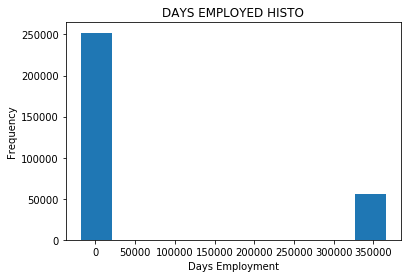

In [29]:
app_train2['DAYS_EMPLOYED'].plot.hist(title = 'DAYS EMPLOYED HISTO');
plt.xlabel('Days Employment');

In [30]:
positive_days_employed =  app_train[app_train['DAYS_EMPLOYED'] > 0]
positive_days_employed['NAME_INCOME_TYPE'].head()

# positive_days_employed['NAME_INCOME_TYPE'].value_counts()

8     Pensioner
11    Pensioner
23    Pensioner
38    Pensioner
43    Pensioner
Name: NAME_INCOME_TYPE, dtype: object

55374 entries have the same input of 365243. Looks like an error. Checking discussion boards. See...

"Thanks for asking the question as encoding of missing values hasn't been explained. Value 365243 denotes infinity in DAYS variables in the datasets, therefore you can consider them NA values. Also XNA/XAP denote NA values."

https://www.kaggle.com/c/home-credit-default-risk/discussion/57247

In [31]:
positive_days_employed =  app_train[app_train['DAYS_EMPLOYED'] > 0]
positive_days_employed['NAME_INCOME_TYPE'].value_counts()

# for col in app_train:
#     if "TYPE" in col:
#         print(col)

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

It looks like all of the people with DAYS_EMPLOYED greater than 0 are either pensioners or unemployed ie all are unemployed. 

Looks like these should really be NaN

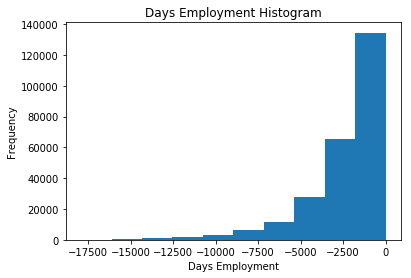

In [32]:
# Create an anomalous flag column
app_train2['DAYS_EMPLOYED_ANOM'] = app_train2["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train2['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train2['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [33]:
app_test2['DAYS_EMPLOYED_ANOM'] = app_test2["DAYS_EMPLOYED"] == 365243
app_test2["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test2["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))



There are 9274 anomalies in the test data out of 48744 entries


# Correlations

Looking at correlation between variables and TARGET. Using Pearson correlation coefficient.

    .00-.19 “very weak”
    .20-.39 “weak”
    .40-.59 “moderate”
    .60-.79 “strong”
    .80-1.0 “very strong”


In [34]:
# Find correlations with the target and sort
correlations = app_train2.corr()['TARGET'].sort_values(ascending=False)
correlations.head()
# # Display correlations
# print('Most Positive Correlations:\n', correlations.tail(15))
# print('\nMost Negative Correlations:\n', correlations.head(15))

TARGET                         1.000000
DAYS_BIRTH                     0.078239
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
Name: TARGET, dtype: float64

# AGES

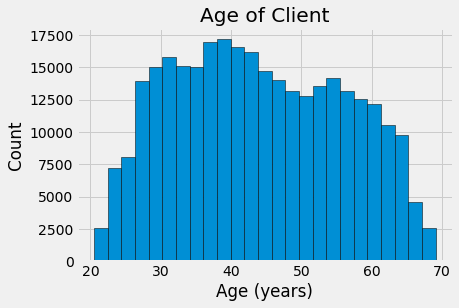

In [35]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train2['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

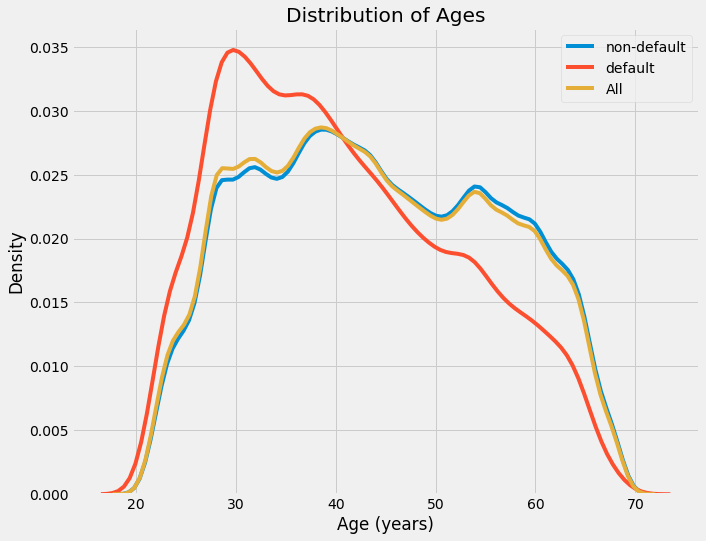

In [36]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'non-default')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'default')

# KDE plot of all loans by age
sns.kdeplot(app_train['DAYS_BIRTH'] / -365, label = 'All')


# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');



Looks like non-defaulting ages closely match the average but defaulting ages scew younger than 40 years old

Intuition is that Age and DAYS_EMPLOYED probably correlate. ie older people are likely to have worked for longer

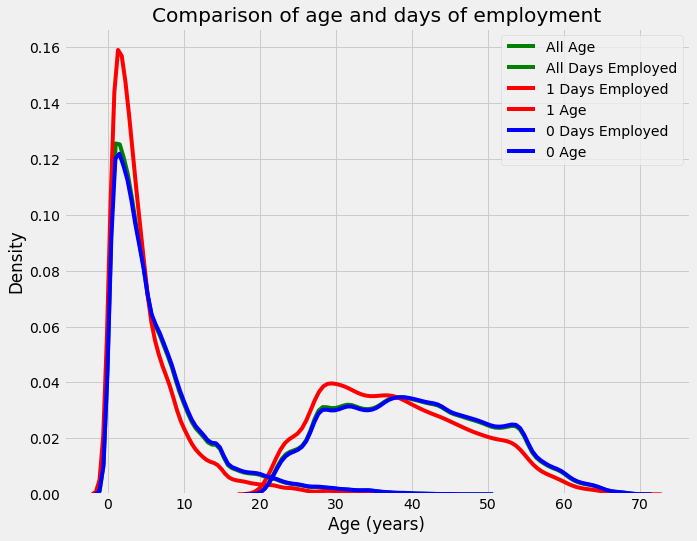

In [37]:
plt.figure(figsize = (10, 8))
day_df = app_train2[app_train2.DAYS_EMPLOYED.notnull()] # dropping NaN values to plot

# KDE plot of all ages and all days employment
sns.kdeplot(day_df['DAYS_BIRTH']/ -365, label = "All Age", color='g') 
sns.kdeplot(day_df['DAYS_EMPLOYED']/ -365, label = "All Days Employed", color='g') 


# KDE plot of defaulting loans by days of employment and birth
sns.kdeplot(day_df.loc[(day_df['TARGET'] == 1), 'DAYS_EMPLOYED']/ -365, label = "1 Days Employed", color='r')
sns.kdeplot(day_df.loc[(day_df['TARGET'] == 1), 'DAYS_BIRTH']/ -365, label = "1 Age", color='r') 



# KDE plot of non-defaulting loans by days of employment and birth
sns.kdeplot(day_df.loc[(day_df['TARGET'] == 0), 'DAYS_EMPLOYED']/ -365, label = "0 Days Employed", color='b')
sns.kdeplot(day_df.loc[(day_df['TARGET'] == 0), 'DAYS_BIRTH']/ -365, label = "0 Age", color='b')   
                           

# # Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Comparison of age and days of employment');


0 employment and 0 age seems to track overall distribution - although that is to be expected as data is heavily unbalanced in favour of non-defaulting. Days employed looks like a Pareto distribution. 

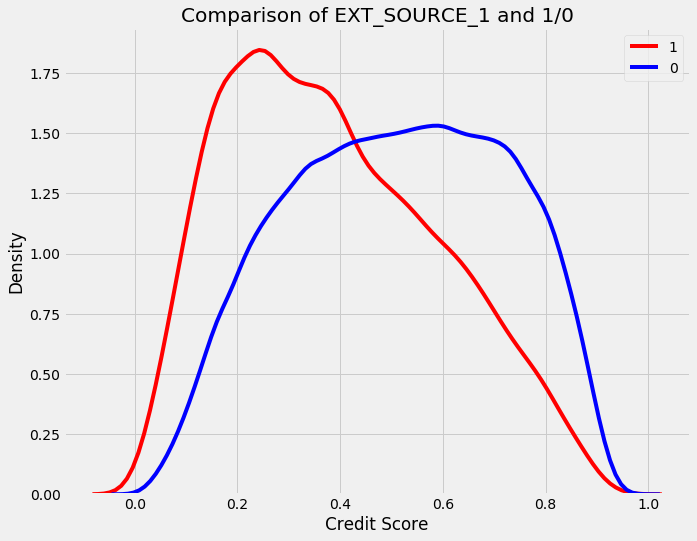

In [38]:
plt.figure(figsize = (10, 8))
ext_df = app_train2[app_train2.EXT_SOURCE_1.notnull()]

sns.kdeplot(ext_df.loc[(ext_df['TARGET'] == 1), 'EXT_SOURCE_1'], label = "1", color='r') 
sns.kdeplot(ext_df.loc[(ext_df['TARGET'] == 0), 'EXT_SOURCE_1'], label = "0", color='b') 


# # Labeling of plot
plt.xlabel('Credit Score'); plt.ylabel('Density'); plt.title('Comparison of EXT_SOURCE_1 and 1/0');




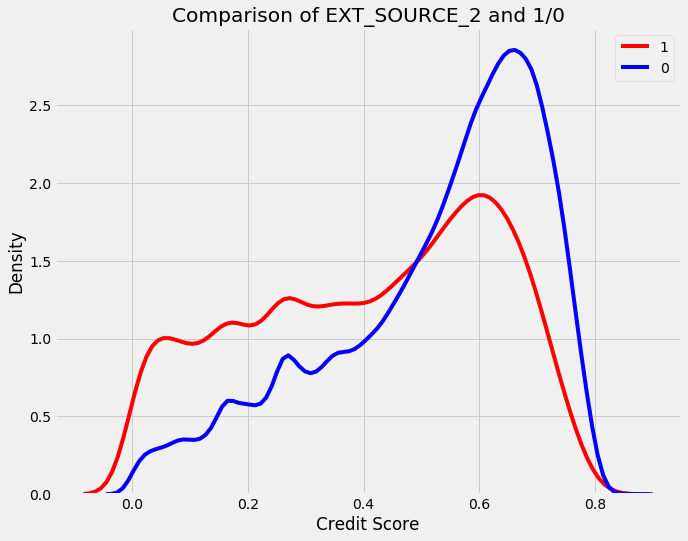

In [39]:
plt.figure(figsize = (10, 8))
ext_df = app_train2[app_train2.EXT_SOURCE_2.notnull()]

sns.kdeplot(ext_df.loc[(ext_df['TARGET'] == 1), 'EXT_SOURCE_2'], label = "1", color='r') 
sns.kdeplot(ext_df.loc[(ext_df['TARGET'] == 0), 'EXT_SOURCE_2'], label = "0", color='b') 


# # Labeling of plot
plt.xlabel('Credit Score'); plt.ylabel('Density'); plt.title('Comparison of EXT_SOURCE_2 and 1/0');




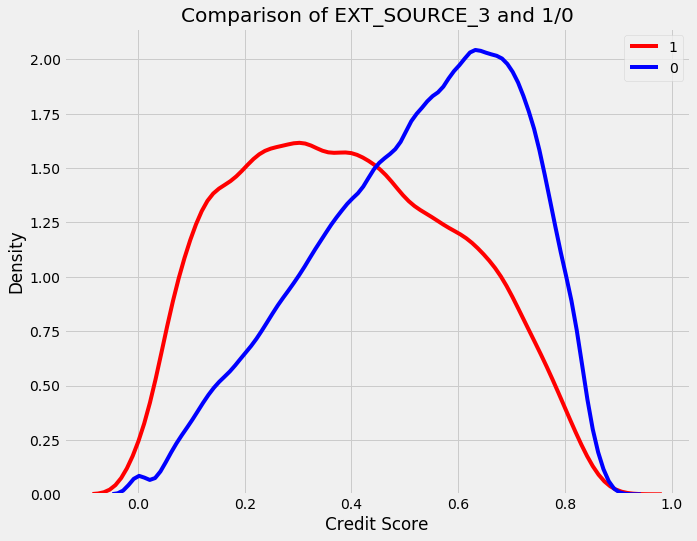

In [40]:
plt.figure(figsize = (10, 8))
ext_df = app_train2[app_train2.EXT_SOURCE_3.notnull()]

sns.kdeplot(ext_df.loc[(ext_df['TARGET'] == 1), 'EXT_SOURCE_3'], label = "1", color='r') 
sns.kdeplot(ext_df.loc[(ext_df['TARGET'] == 0), 'EXT_SOURCE_3'], label = "0", color='b') 


# # Labeling of plot
plt.xlabel('Credit Score'); plt.ylabel('Density'); plt.title('Comparison of EXT_SOURCE_3 and 1/0');



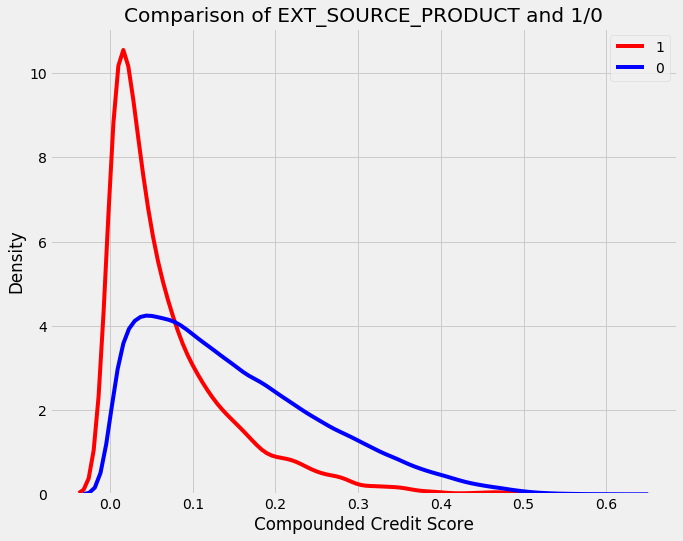

In [41]:
plt.figure(figsize = (10, 8))
# combining credit scores

app_train2['EXT_SOURCE_1_2_3_PRODUCT'] = app_train2.EXT_SOURCE_1 * app_train2.EXT_SOURCE_2 * app_train2.EXT_SOURCE_3
app_test2['EXT_SOURCE_1_2_3_PRODUCT'] = app_test2.EXT_SOURCE_1 * app_test2.EXT_SOURCE_2 * app_test2.EXT_SOURCE_3
ext_product = app_train2[app_train2.EXT_SOURCE_1_2_3_PRODUCT.notnull()]



product = app_train2['EXT_SOURCE_1_2_3_PRODUCT'].notnull()


sns.kdeplot(ext_product.loc[(ext_product['TARGET'] == 1), 'EXT_SOURCE_1_2_3_PRODUCT'], label = "1", color='r') 
sns.kdeplot(ext_product.loc[(ext_product['TARGET'] == 0), 'EXT_SOURCE_1_2_3_PRODUCT'], label = "0", color='b') 


# Labeling of plot
plt.xlabel('Compounded Credit Score'); plt.ylabel('Density'); plt.title('Comparison of EXT_SOURCE_PRODUCT and 1/0');



Just using EXT_SOURCE_1 and EXT_SOURCE_3

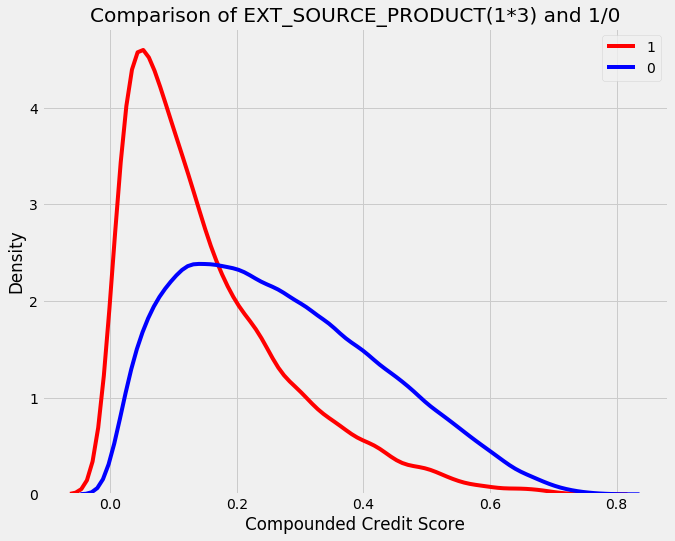

In [42]:
plt.figure(figsize = (10, 8))
# combining credit scores

app_train2['EXT_SOURCE_1_3_PRODUCT'] = app_train2.EXT_SOURCE_1 *  app_train2.EXT_SOURCE_3
app_test2['EXT_SOURCE_1_3_PRODUCT'] = app_test2.EXT_SOURCE_1 *  app_test2.EXT_SOURCE_3
ext_product = app_train2[app_train2.EXT_SOURCE_1_3_PRODUCT.notnull()]



product = app_train2['EXT_SOURCE_1_3_PRODUCT'].notnull()


sns.kdeplot(ext_product.loc[(ext_product['TARGET'] == 1), 'EXT_SOURCE_1_3_PRODUCT'], label = "1", color='r') 
sns.kdeplot(ext_product.loc[(ext_product['TARGET'] == 0), 'EXT_SOURCE_1_3_PRODUCT'], label = "0", color='b') 


# Labeling of plot
plt.xlabel('Compounded Credit Score'); plt.ylabel('Density'); plt.title('Comparison of EXT_SOURCE_PRODUCT(1*3) and 1/0');


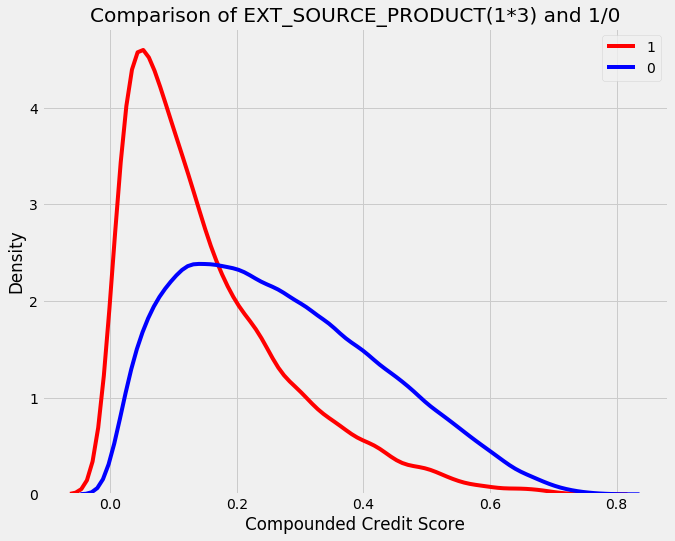

In [43]:
plt.figure(figsize = (10, 8))
# combining credit scores

app_train2['EXT_SOURCE_1_3_PRODUCT'] = app_train2.EXT_SOURCE_1 *  app_train2.EXT_SOURCE_3
app_test2['EXT_SOURCE_1_3_PRODUCT'] = app_test2.EXT_SOURCE_1 *  app_test2.EXT_SOURCE_3
ext_product = app_train2[app_train2.EXT_SOURCE_1_3_PRODUCT.notnull()]



product = app_train2['EXT_SOURCE_1_3_PRODUCT'].notnull()


sns.kdeplot(ext_product.loc[(ext_product['TARGET'] == 1), 'EXT_SOURCE_1_3_PRODUCT'], label = "1", color='r') 
sns.kdeplot(ext_product.loc[(ext_product['TARGET'] == 0), 'EXT_SOURCE_1_3_PRODUCT'], label = "0", color='b') 


# Labeling of plot
plt.xlabel('Compounded Credit Score'); plt.ylabel('Density'); plt.title('Comparison of EXT_SOURCE_PRODUCT(1*3) and 1/0');


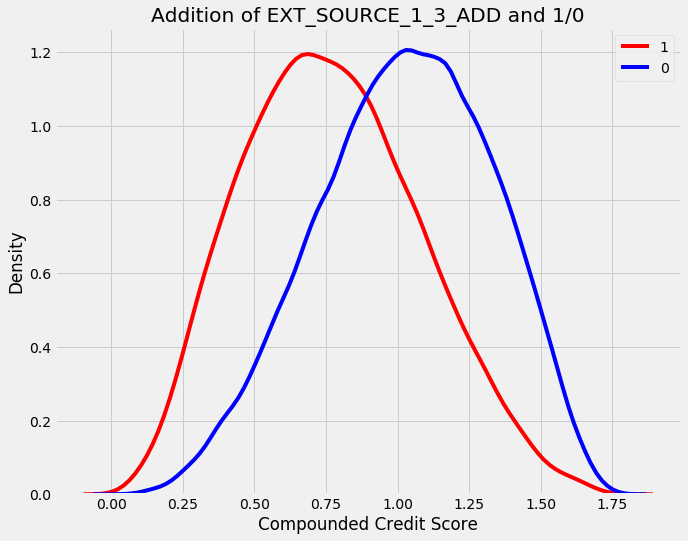

In [44]:
plt.figure(figsize = (10, 8))
# combining credit scores

app_train2['EXT_SOURCE_1_3_ADD'] = app_train2.EXT_SOURCE_1 +  app_train2.EXT_SOURCE_3
app_test2['EXT_SOURCE_1_3_ADD'] = app_test2.EXT_SOURCE_1 +  app_test2.EXT_SOURCE_3
ext_product = app_train2[app_train2.EXT_SOURCE_1_3_PRODUCT.notnull()]



product = app_train2['EXT_SOURCE_1_3_ADD'].notnull()


sns.kdeplot(ext_product.loc[(ext_product['TARGET'] == 1), 'EXT_SOURCE_1_3_ADD'], label = "1", color='r') 
sns.kdeplot(ext_product.loc[(ext_product['TARGET'] == 0), 'EXT_SOURCE_1_3_ADD'], label = "0", color='b') 


# Labeling of plot
plt.xlabel('Compounded Credit Score'); plt.ylabel('Density'); plt.title('Addition of EXT_SOURCE_1_3_ADD and 1/0');


In [45]:
app_train2[app_train2['EXT_SOURCE_1_3_ADD'] < 1.00 ].head()

SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       100002                   0             0                1   
10      100014                   0             0                1   
12      100016                   0             0                1   
15      100019                   0             1                1   
21      100025                   0             1                1   

    CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0              0          202500.0    406597.5      24700.5         351000.0   
10             1          112500.0    652500.0      21177.0         652500.0   
12             0           67500.0     80865.0       5881.5          67500.0   
15             0          157500.0    299772.0      20160.0         247500.0   
21             1          202500.0   1132573.5      37561.5         927000.0   

    REGION_POPULATION_RELATIVE         ...          WALLSMATERIAL_MODE_Panel  \
0                     0.018801         ...                                 0   
10                    0.022800         ...                                 0   
12                    0.031329         ...                                 0   
15                    0.020713         ...                                 0   
21                    0.025164         ...                                 0   

    WALLSMATERIAL_MODE_Stone, brick  WALLSMATERIAL_MODE_Wooden  \
0                                 1                          0   
10                                0                          0   
12                                0                          0   
15                                0                          0   
21                                0                          0   

    EMERGENCYSTATE_MODE_No  EMERGENCYSTATE_MODE_Yes  TARGET  \
0                        1                        0       1   
10                       0                        0       0   
12                       1                        0       0   
15                       0                        0       0   
21                       0                        0       0   

    DAYS_EMPLOYED_ANOM  EXT_SOURCE_1_2_3_PRODUCT  EXT_SOURCE_1_3_PRODUCT  \
0                False                  0.003043                0.011573   
10               False                  0.075861                0.116375   
12               False                  0.058715                0.082114   
15               False                  0.027199                0.078466   
21               False                  0.055504                0.237433   

    EXT_SOURCE_1_3_ADD  
0             0.222413  
10            0.683705  
12            0.641484  
15            0.794202  
21            0.980154  

[5 rows x 243 columns]

In [46]:
app_train2[app_train2['EXT_SOURCE_1_3_ADD'] >= 1.00 ].head()

SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
6       100009                   0             1                1   
8       100011                   0             0                1   
11      100015                   0             0                1   
25      100030                   0             0                1   
28      100033                   0             1                1   

    CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
6              1        171000.000   1560726.0      41301.0        1395000.0   
8              0        112500.000   1019610.0      33826.5         913500.0   
11             0         38419.155    148365.0      10678.5         135000.0   
25             0         90000.000    225000.0      11074.5         225000.0   
28             0        270000.000    790830.0      57676.5         675000.0   

    REGION_POPULATION_RELATIVE         ...          WALLSMATERIAL_MODE_Panel  \
6                     0.035792         ...                                 0   
8                     0.018634         ...                                 0   
11                    0.015221         ...                                 0   
25                    0.028663         ...                                 0   
28                    0.046220         ...                                 0   

    WALLSMATERIAL_MODE_Stone, brick  WALLSMATERIAL_MODE_Wooden  \
6                                 0                          0   
8                                 0                          0   
11                                0                          0   
25                                1                          0   
28                                0                          0   

    EMERGENCYSTATE_MODE_No  EMERGENCYSTATE_MODE_Yes  TARGET  \
6                        0                        0       0   
8                        0                        0       0   
11                       0                        0       0   
25                       1                        0       0   
28                       0                        0       0   

    DAYS_EMPLOYED_ANOM  EXT_SOURCE_1_2_3_PRODUCT  EXT_SOURCE_1_3_PRODUCT  \
6                False                  0.276010                0.381229   
8                 True                  0.090840                0.441513   
11                True                  0.261725                0.471420   
25               False                  0.168929                0.259329   
28               False                  0.215714                0.314906   

    EXT_SOURCE_1_3_ADD  
6             1.266822  
8             1.339058  
11            1.374941  
25            1.023431  
28            1.124892  

[5 rows x 243 columns]

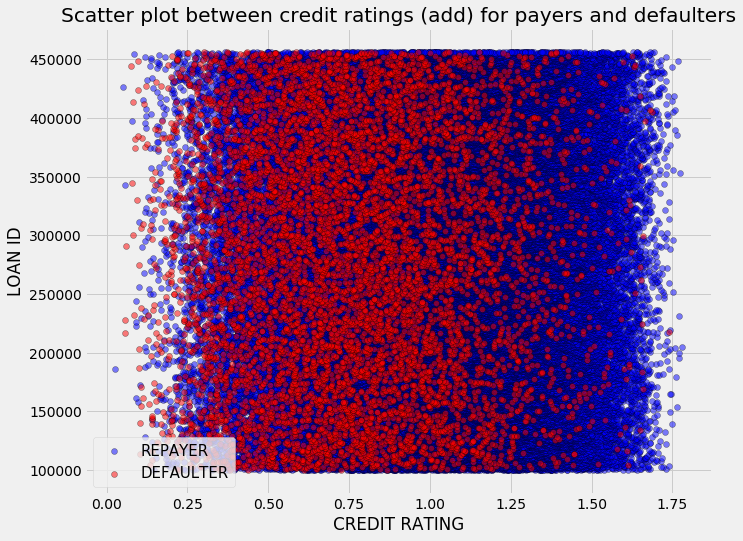

In [47]:
fig = plt.figure(figsize=(10,8))
plt.scatter(ext_product[ext_product["TARGET"]==0]['EXT_SOURCE_1_3_ADD'],ext_product[ext_product["TARGET"]==0]['SK_ID_CURR'],s=35,
            color="b",alpha=.5,label="REPAYER",linewidth=.5,edgecolor="k")
plt.scatter(ext_product[ext_product["TARGET"]==1]['EXT_SOURCE_1_3_ADD'],ext_product[ext_product["TARGET"]==1]['SK_ID_CURR'],s=35,
            color="r",alpha=.5,label="DEFAULTER",linewidth=.5,edgecolor="k")
plt.legend(loc="best",prop={"size":15})
plt.xlabel("CREDIT RATING")
plt.ylabel("LOAN ID")
plt.title("Scatter plot between credit ratings (add) for payers and defaulters")
plt.show()

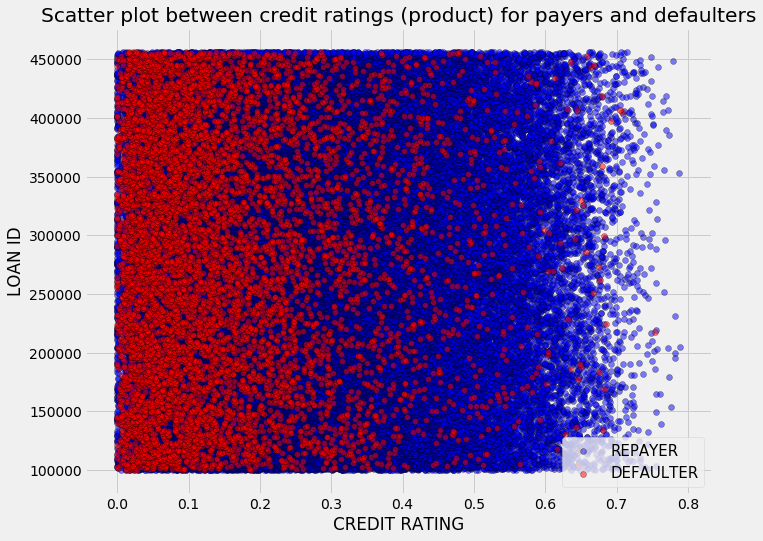

In [48]:
fig = plt.figure(figsize=(10,8))
plt.scatter(ext_product[ext_product["TARGET"]==0]['EXT_SOURCE_1_3_PRODUCT'],ext_product[ext_product["TARGET"]==0]['SK_ID_CURR'],s=35,
            color="b",alpha=.5,label="REPAYER",linewidth=.5,edgecolor="k")
plt.scatter(ext_product[ext_product["TARGET"]==1]['EXT_SOURCE_1_3_PRODUCT'],ext_product[ext_product["TARGET"]==1]['SK_ID_CURR'],s=35,
            color="r",alpha=.5,label="DEFAULTER",linewidth=.5,edgecolor="k")

plt.legend(loc="best",prop={"size":15})
plt.xlabel("CREDIT RATING")
plt.ylabel("LOAN ID")
plt.title("Scatter plot between credit ratings (product) for payers and defaulters")
plt.show()

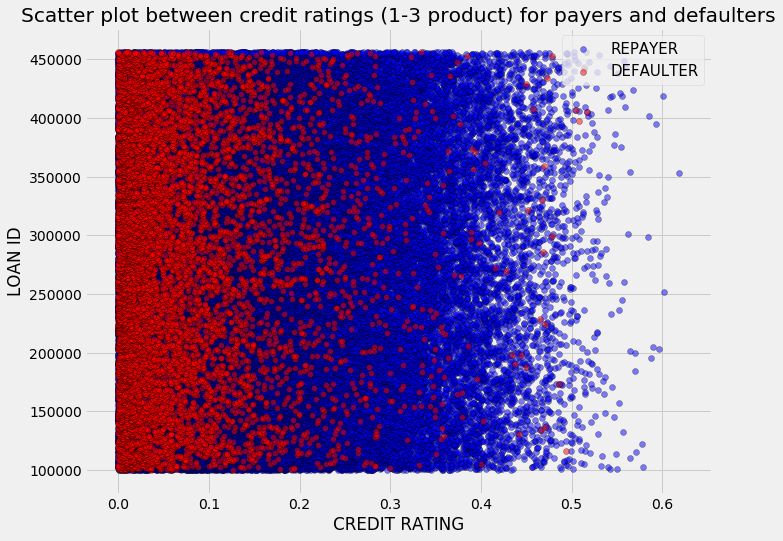

In [49]:
fig = plt.figure(figsize=(10,8))
plt.scatter(ext_product[ext_product["TARGET"]==0]['EXT_SOURCE_1_2_3_PRODUCT'],ext_product[ext_product["TARGET"]==0]['SK_ID_CURR'],s=35,
            color="b",alpha=.5,label="REPAYER",linewidth=.5,edgecolor="k")
plt.scatter(ext_product[ext_product["TARGET"]==1]['EXT_SOURCE_1_2_3_PRODUCT'],ext_product[ext_product["TARGET"]==1]['SK_ID_CURR'],s=35,
            color="r",alpha=.5,label="DEFAULTER",linewidth=.5,edgecolor="k")

plt.legend(loc="best",prop={"size":15})
plt.xlabel("CREDIT RATING")
plt.ylabel("LOAN ID")
plt.title("Scatter plot between credit ratings (1-3 product) for payers and defaulters")

plt.show()

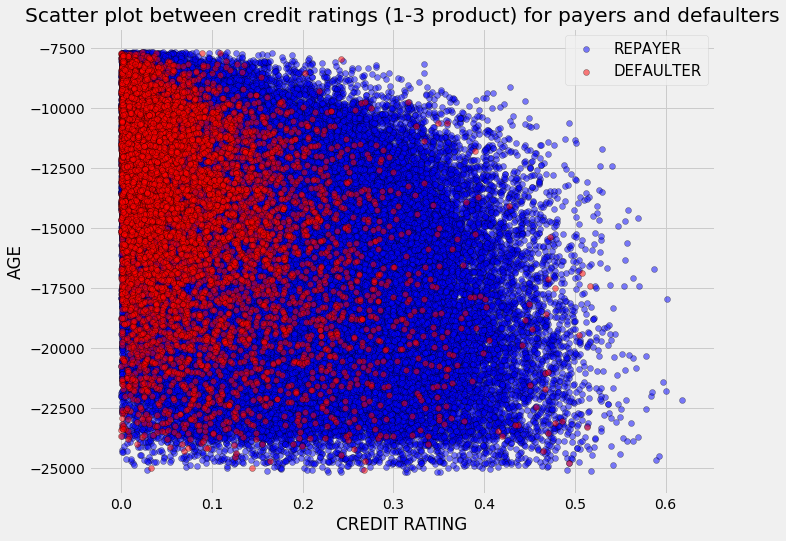

In [50]:
fig = plt.figure(figsize=(10,8))
plt.scatter(ext_product[ext_product["TARGET"]==0]['EXT_SOURCE_1_2_3_PRODUCT'],ext_product[ext_product["TARGET"]==0]['DAYS_BIRTH'],s=35,
            color="b",alpha=.5,label="REPAYER",linewidth=.5,edgecolor="k")
plt.scatter(ext_product[ext_product["TARGET"]==1]['EXT_SOURCE_1_2_3_PRODUCT'],ext_product[ext_product["TARGET"]==1]['DAYS_BIRTH'],s=35,
            color="r",alpha=.5,label="DEFAULTER",linewidth=.5,edgecolor="k")

plt.legend(loc="best",prop={"size":15})
plt.xlabel("CREDIT RATING")
plt.ylabel("AGE")
plt.title("Scatter plot between credit ratings (1-3 product) for payers and defaulters")

plt.show()

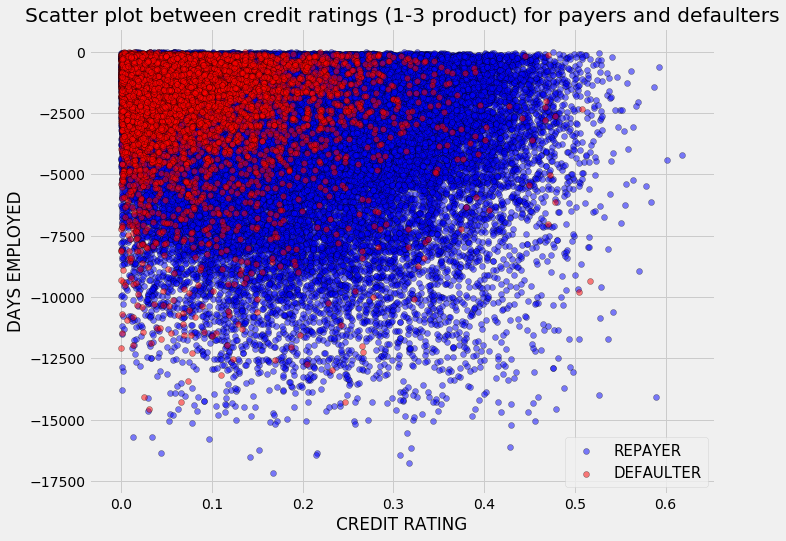

In [51]:
fig = plt.figure(figsize=(10,8))
plt.scatter(ext_product[ext_product["TARGET"]==0]['EXT_SOURCE_1_2_3_PRODUCT'],ext_product[ext_product["TARGET"]==0]['DAYS_EMPLOYED'],s=35,
            color="b",alpha=.5,label="REPAYER",linewidth=.5,edgecolor="k")
plt.scatter(ext_product[ext_product["TARGET"]==1]['EXT_SOURCE_1_2_3_PRODUCT'],ext_product[ext_product["TARGET"]==1]['DAYS_EMPLOYED'],s=35,
            color="r",alpha=.5,label="DEFAULTER",linewidth=.5,edgecolor="k")

plt.legend(loc="best",prop={"size":15})
plt.xlabel("CREDIT RATING")
plt.ylabel("DAYS EMPLOYED")
plt.title("Scatter plot between credit ratings (1-3 product) for payers and defaulters")

plt.show()

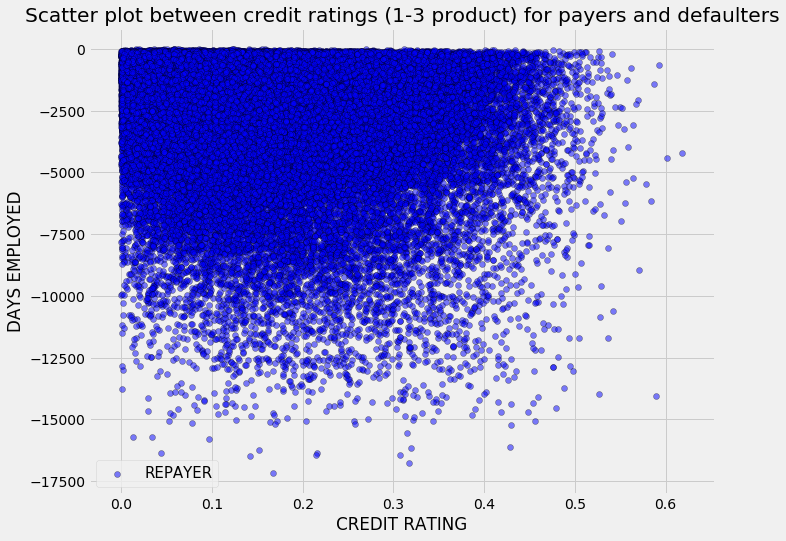

In [52]:
fig = plt.figure(figsize=(10,8))
plt.scatter(ext_product[ext_product["TARGET"]==0]['EXT_SOURCE_1_2_3_PRODUCT'],ext_product[ext_product["TARGET"]==0]['DAYS_EMPLOYED'],s=35,
            color="b",alpha=.5,label="REPAYER",linewidth=.5,edgecolor="k")
# plt.scatter(ext_product[ext_product["TARGET"]==1]['EXT_SOURCE_1_2_3_PRODUCT'],ext_product[ext_product["TARGET"]==1]['DAYS_EMPLOYED'],s=35,
#             color="r",alpha=.5,label="DEFAULTER",linewidth=.5,edgecolor="k")

plt.legend(loc="best",prop={"size":15})
plt.xlabel("CREDIT RATING")
plt.ylabel("DAYS EMPLOYED")
plt.title("Scatter plot between credit ratings (1-3 product) for payers and defaulters")

plt.show()

Comparison of credit rates and income

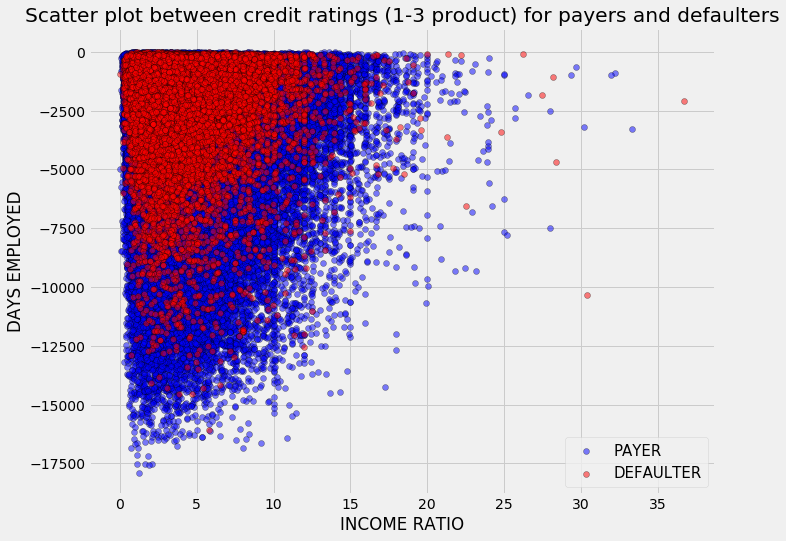

In [53]:

app_train2["INCOME_RATIO"] = app_train2['AMT_CREDIT']/ app_train2['AMT_INCOME_TOTAL']
app_test2["INCOME_RATIO"] = app_test2['AMT_CREDIT']/ app_test2['AMT_INCOME_TOTAL']
fig = plt.figure(figsize=(10,8))


plt.scatter(app_train2[app_train2["TARGET"]==0]['INCOME_RATIO'],app_train2[app_train2["TARGET"]==0]['DAYS_EMPLOYED'],s=35,
            color="b",alpha=.5,label="PAYER",linewidth=.5,edgecolor="k")


plt.scatter(app_train2[app_train2["TARGET"]==1]['INCOME_RATIO'],app_train2[app_train2["TARGET"]==1]['DAYS_EMPLOYED'],s=35,
            color="r",alpha=.5,label="DEFAULTER",linewidth=.5,edgecolor="k")

plt.legend(loc="best",prop={"size":15})
plt.xlabel("INCOME RATIO")
plt.ylabel("DAYS EMPLOYED")
plt.title("Scatter plot between credit ratings (1-3 product) for payers and defaulters")

plt.show()

In [54]:
app_train2.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100002                   0             0                1   
1      100003                   0             0                0   
2      100004                   1             1                1   
3      100006                   0             0                1   
4      100007                   0             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   REGION_POPULATION_RELATIVE      ...       WALLSMATERIAL_MODE_Stone, brick  \
0                    0.018801      ...                                     1   
1                    0.003541      ...                                     0   
2                    0.010032      ...                                     0   
3                    0.008019      ...                                     0   
4                    0.028663      ...                                     0   

   WALLSMATERIAL_MODE_Wooden  EMERGENCYSTATE_MODE_No  EMERGENCYSTATE_MODE_Yes  \
0                          0                       1                        0   
1                          0                       1                        0   
2                          0                       0                        0   
3                          0                       0                        0   
4                          0                       0                        0   

   TARGET  DAYS_EMPLOYED_ANOM  EXT_SOURCE_1_2_3_PRODUCT  \
0       1               False                  0.003043   
1       0               False                       NaN   
2       0               False                       NaN   
3       0               False                       NaN   
4       0               False                       NaN   

   EXT_SOURCE_1_3_PRODUCT  EXT_SOURCE_1_3_ADD  INCOME_RATIO  
0                0.011573            0.222413      2.007889  
1                     NaN                 NaN      4.790750  
2                     NaN                 NaN      2.000000  
3                     NaN                 NaN      2.316167  
4                     NaN                 NaN      4.222222  

[5 rows x 244 columns]

In [55]:
ext_product['EXT_SOURCE_1_2_3_PRODUCT'].describe() 

count    1.095890e+05
mean     1.433152e-01
std      1.075977e-01
min      2.430332e-07
25%      5.610600e-02
50%      1.199324e-01
75%      2.101258e-01
max      6.185571e-01
Name: EXT_SOURCE_1_2_3_PRODUCT, dtype: float64

ext_product[ext_product['EXT_SOURCE_1_2_3_PRODUCT'] < 0.2].describe()

In [56]:
ext_product[ext_product['EXT_SOURCE_1_2_3_PRODUCT'] > 0.2].describe()

SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
count   29856.000000        29856.000000  29856.000000     29856.000000   
mean   278631.419246            0.100616      0.351454         0.706357   
std    102829.155750            0.300825      0.477432         0.455438   
min    100009.000000            0.000000      0.000000         0.000000   
25%    189311.250000            0.000000      0.000000         0.000000   
50%    279610.500000            0.000000      0.000000         1.000000   
75%    368218.750000            0.000000      1.000000         1.000000   
max    456244.000000            1.000000      1.000000         1.000000   

       CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  29856.000000      2.985600e+04  2.985600e+04   29854.000000   
mean       0.391412      1.872134e+05  7.061807e+05   30462.628207   
std        0.690873      1.114104e+05  4.621145e+05   16502.744160   
min        0.000000      2.700000e+04  4.500000e+04    1980.000000   
25%        0.000000      1.125000e+05  3.150000e+05   18735.750000   
50%        0.000000      1.575000e+05  6.126120e+05   27384.750000   
75%        1.000000      2.250000e+05  9.712800e+05   39204.000000   
max       14.000000      3.600000e+06  4.050000e+06  258025.500000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE         ...          \
count     2.984500e+04                29856.000000         ...           
mean      6.424549e+05                    0.023388         ...           
std       4.278939e+05                    0.015979         ...           
min       4.500000e+04                    0.000290         ...           
25%       2.700000e+05                    0.010147         ...           
50%       5.400000e+05                    0.019689         ...           
75%       9.000000e+05                    0.031329         ...           
max       4.050000e+06                    0.072508         ...           

       WALLSMATERIAL_MODE_Others  WALLSMATERIAL_MODE_Panel  \
count               29856.000000              29856.000000   
mean                    0.006263                  0.262024   
std                     0.078895                  0.439743   
min                     0.000000                  0.000000   
25%                     0.000000                  0.000000   
50%                     0.000000                  0.000000   
75%                     0.000000                  1.000000   
max                     1.000000                  1.000000   

       WALLSMATERIAL_MODE_Stone, brick  WALLSMATERIAL_MODE_Wooden  \
count                     29856.000000               29856.000000   
mean                          0.245579                   0.014068   
std                           0.430437                   0.117771   
min                           0.000000                   0.000000   
25%                           0.000000                   0.000000   
50%                           0.000000                   0.000000   
75%                           0.000000                   0.000000   
max                           1.000000                   1.000000   

       EMERGENCYSTATE_MODE_No  EMERGENCYSTATE_MODE_Yes        TARGET  \
count            29856.000000             29856.000000  29856.000000   
mean                 0.613210                 0.006297      0.020398   
std                  0.487023                 0.079104      0.141359   
min                  0.000000                 0.000000      0.000000   
25%                  0.000000                 0.000000      0.000000   
50%                  1.000000                 0.000000      0.000000   
75%                  1.000000                 0.000000      0.000000   
max                  1.000000                 1.000000      1.000000   

       EXT_SOURCE_1_2_3_PRODUCT  EXT_SOURCE_1_3_PRODUCT  EXT_SOURCE_1_3_ADD  
count              29856.000000            29856.000000        29856.000000  
mean                   0.289231                0.4

Credit factors: number of loans, amount of free credit, instances of default, high use of borrowing

In [57]:
# Low credit ratings who didn't default
ext_product.loc[(ext_product.TARGET==0) & (ext_product.EXT_SOURCE_1_2_3_PRODUCT < 0.2) ].describe()

SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
count   72344.000000        72344.000000  72344.000000     72344.000000   
mean   277913.998272            0.104584      0.388173         0.656240   
std    102898.171042            0.306018      0.487338         0.474966   
min    100011.000000            0.000000      0.000000         0.000000   
25%    188970.750000            0.000000      0.000000         0.000000   
50%    277437.000000            0.000000      0.000000         1.000000   
75%    367372.750000            0.000000      1.000000         1.000000   
max    456255.000000            1.000000      1.000000         1.000000   

       CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  72344.000000      7.234400e+04  7.234400e+04   72339.000000   
mean       0.565230      1.761809e+05  5.949464e+05   27238.322585   
std        0.791773      1.046365e+05  3.970366e+05   14176.841887   
min        0.000000      2.700000e+04  4.500000e+04    2187.000000   
25%        0.000000      1.125000e+05  2.700000e+05   16679.250000   
50%        0.000000      1.575000e+05  5.094000e+05   25312.500000   
75%        1.000000      2.160000e+05  8.086500e+05   34911.000000   
max       19.000000      9.000000e+06  4.050000e+06  225000.000000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE         ...          \
count     7.226000e+04                72344.000000         ...           
mean      5.356123e+05                    0.020215         ...           
std       3.641812e+05                    0.013056         ...           
min       4.500000e+04                    0.000290         ...           
25%       2.385000e+05                    0.010006         ...           
50%       4.500000e+05                    0.018801         ...           
75%       6.795000e+05                    0.026392         ...           
max       4.050000e+06                    0.072508         ...           

       WALLSMATERIAL_MODE_Others  WALLSMATERIAL_MODE_Panel  \
count               72344.000000              72344.000000   
mean                    0.004879                  0.222230   
std                     0.069683                  0.415748   
min                     0.000000                  0.000000   
25%                     0.000000                  0.000000   
50%                     0.000000                  0.000000   
75%                     0.000000                  0.000000   
max                     1.000000                  1.000000   

       WALLSMATERIAL_MODE_Stone, brick  WALLSMATERIAL_MODE_Wooden  \
count                     72344.000000               72344.000000   
mean                          0.211407                   0.016532   
std                           0.408309                   0.127511   
min                           0.000000                   0.000000   
25%                           0.000000                   0.000000   
50%                           0.000000                   0.000000   
75%                           0.000000                   0.000000   
max                           1.000000                   1.000000   

       EMERGENCYSTATE_MODE_No  EMERGENCYSTATE_MODE_Yes   TARGET  \
count            72344.000000             72344.000000  72344.0   
mean                 0.525434                 0.007782      0.0   
std                  0.499356                 0.087874      0.0   
min                  0.000000                 0.000000      0.0   
25%                  0.000000                 0.000000      0.0   
50%                  1.000000                 0.000000      0.0   
75%                  1.000000                 0.000000      0.0   
max                  1.000000                 1.000000      0.0   

       EXT_SOURCE_1_2_3_PRODUCT  EXT_SOURCE_1_3_PRODUCT  EXT_SOURCE_1_3_ADD  
count              7.234400e+04            72344.000000        72344.000000  
mean               9.214344e-02                0.195748            0.893436  
std              

In [58]:
# Low credit ratings who did default
ext_product.loc[(ext_product.TARGET==1) & (ext_product.EXT_SOURCE_1_2_3_PRODUCT < 0.2) ].describe()

SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
count    7389.000000         7389.000000   7389.000000      7389.000000   
mean   277794.207606            0.065773      0.342401         0.655840   
std    103096.724667            0.247902      0.474545         0.475126   
min    100002.000000            0.000000      0.000000         0.000000   
25%    188660.000000            0.000000      0.000000         0.000000   
50%    278018.000000            0.000000      0.000000         1.000000   
75%    367550.000000            0.000000      1.000000         1.000000   
max    456215.000000            1.000000      1.000000         1.000000   

       CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT   AMT_ANNUITY  \
count   7389.000000      7.389000e+03  7.389000e+03   7389.000000   
mean       0.563540      1.871317e+05  5.698612e+05  27432.232034   
std        0.804648      1.362305e+06  3.511825e+05  12603.505374   
min        0.000000      2.925000e+04  4.500000e+04   2844.000000   
25%        0.000000      1.125000e+05  2.925000e+05  18000.000000   
50%        0.000000      1.575000e+05  5.002110e+05  26100.000000   
75%        1.000000      2.025000e+05  7.493490e+05  34731.000000   
max       11.000000      1.170000e+08  3.020760e+06  93510.000000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE         ...          \
count     7.385000e+03                 7389.000000         ...           
mean      5.012511e+05                    0.019107         ...           
std       3.157753e+05                    0.011580         ...           
min       4.500000e+04                    0.000938         ...           
25%       2.475000e+05                    0.009657         ...           
50%       4.500000e+05                    0.018634         ...           
75%       6.750000e+05                    0.025164         ...           
max       2.700000e+06                    0.072508         ...           

       WALLSMATERIAL_MODE_Others  WALLSMATERIAL_MODE_Panel  \
count                7389.000000               7389.000000   
mean                    0.007850                  0.183922   
std                     0.088255                  0.387447   
min                     0.000000                  0.000000   
25%                     0.000000                  0.000000   
50%                     0.000000                  0.000000   
75%                     0.000000                  0.000000   
max                     1.000000                  1.000000   

       WALLSMATERIAL_MODE_Stone, brick  WALLSMATERIAL_MODE_Wooden  \
count                      7389.000000                7389.000000   
mean                          0.202598                   0.019353   
std                           0.401963                   0.137772   
min                           0.000000                   0.000000   
25%                           0.000000                   0.000000   
50%                           0.000000                   0.000000   
75%                           0.000000                   0.000000   
max                           1.000000                   1.000000   

       EMERGENCYSTATE_MODE_No  EMERGENCYSTATE_MODE_Yes  TARGET  \
count             7389.000000              7389.000000  7389.0   
mean                 0.473271                 0.008526     1.0   
std                  0.499319                 0.091949     0.0   
min                  0.000000                 0.000000     1.0   
25%                  0.000000                 0.000000     1.0   
50%                  0.000000                 0.000000     1.0   
75%                  1.000000                 0.000000     1.0   
max                  1.000000                 1.000000     1.0   

       EXT_SOURCE_1_2_3_PRODUCT  EXT_SOURCE_1_3_PRODUCT  EXT_SOURCE_1_3_ADD  
count              7.389000e+03             7389.000000         7389.000000  
mean               5.473604e-02                0.131115            0.724195  
std                4.923782e-02    

In [59]:
ext = app_train2.dropna()

In [60]:
ext.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
71       100083                   0             1                1   
124      100145                   0             1                1   
152      100179                   0             1                0   
161      100190                   0             1                0   
164      100193                   0             1                0   

     CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
71              0          103500.0    573628.5      24435.0         463500.0   
124             1          202500.0    260725.5      16789.5         198000.0   
152             0          202500.0    675000.0      53329.5         675000.0   
161             0          162000.0    263686.5      24781.5         238500.0   
164             0          225000.0    296280.0      15124.5         225000.0   

     REGION_POPULATION_RELATIVE      ...       \
71                     0.009657      ...        
124                    0.018850      ...        
152                    0.031329      ...        
161                    0.022625      ...        
164                    0.020246      ...        

     WALLSMATERIAL_MODE_Stone, brick  WALLSMATERIAL_MODE_Wooden  \
71                                 1                          0   
124                                0                          0   
152                                0                          0   
161                                0                          0   
164                                1                          0   

     EMERGENCYSTATE_MODE_No  EMERGENCYSTATE_MODE_Yes  TARGET  \
71                        1                        0       0   
124                       1                        0       0   
152                       1                        0       0   
161                       1                        0       0   
164                       1                        0       0   

     DAYS_EMPLOYED_ANOM  EXT_SOURCE_1_2_3_PRODUCT  EXT_SOURCE_1_3_PRODUCT  \
71                False                  0.114342                0.161700   
124               False                  0.357143                0.478433   
152               False                  0.280180                0.454722   
161               False                  0.247199                0.421943   
164               False                  0.278283                0.371611   

     EXT_SOURCE_1_3_ADD  INCOME_RATIO  
71             0.867959      5.542304  
124            1.386457      1.287533  
152            1.348662      3.333333  
161            1.323679      1.627694  
164            1.239392      1.316800  

[5 rows x 244 columns]

Exploring common credit characteristics like credit and income ratios

In [61]:
app_train_domain = ext.copy()
app_test_domain = ext.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [62]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

In [63]:
# app_test_domain = app_test_domain.dropna()
# app_train_domain = app_train_domain.dropna()


In [64]:
app_test_domain.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
71       100083                   0             1                1   
124      100145                   0             1                1   
152      100179                   0             1                0   
161      100190                   0             1                0   
164      100193                   0             1                0   

     CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
71              0          103500.0    573628.5      24435.0         463500.0   
124             1          202500.0    260725.5      16789.5         198000.0   
152             0          202500.0    675000.0      53329.5         675000.0   
161             0          162000.0    263686.5      24781.5         238500.0   
164             0          225000.0    296280.0      15124.5         225000.0   

     REGION_POPULATION_RELATIVE          ...            TARGET  \
71                     0.009657          ...                 0   
124                    0.018850          ...                 0   
152                    0.031329          ...                 0   
161                    0.022625          ...                 0   
164                    0.020246          ...                 0   

     DAYS_EMPLOYED_ANOM  EXT_SOURCE_1_2_3_PRODUCT  EXT_SOURCE_1_3_PRODUCT  \
71                False                  0.114342                0.161700   
124               False                  0.357143                0.478433   
152               False                  0.280180                0.454722   
161               False                  0.247199                0.421943   
164               False                  0.278283                0.371611   

     EXT_SOURCE_1_3_ADD  INCOME_RATIO  CREDIT_INCOME_PERCENT  \
71             0.867959      5.542304               5.542304   
124            1.386457      1.287533               1.287533   
152            1.348662      3.333333               3.333333   
161            1.323679      1.627694               1.627694   
164            1.239392      1.316800               1.316800   

     ANNUITY_INCOME_PERCENT  CREDIT_TERM  DAYS_EMPLOYED_PERCENT  
71                 0.236087     0.042597               0.057900  
124                0.082911     0.064395               0.268702  
152                0.263356     0.079007               0.203165  
161                0.152972     0.093981               0.320069  
164                0.067220     0.051048               0.052576  

[5 rows x 248 columns]

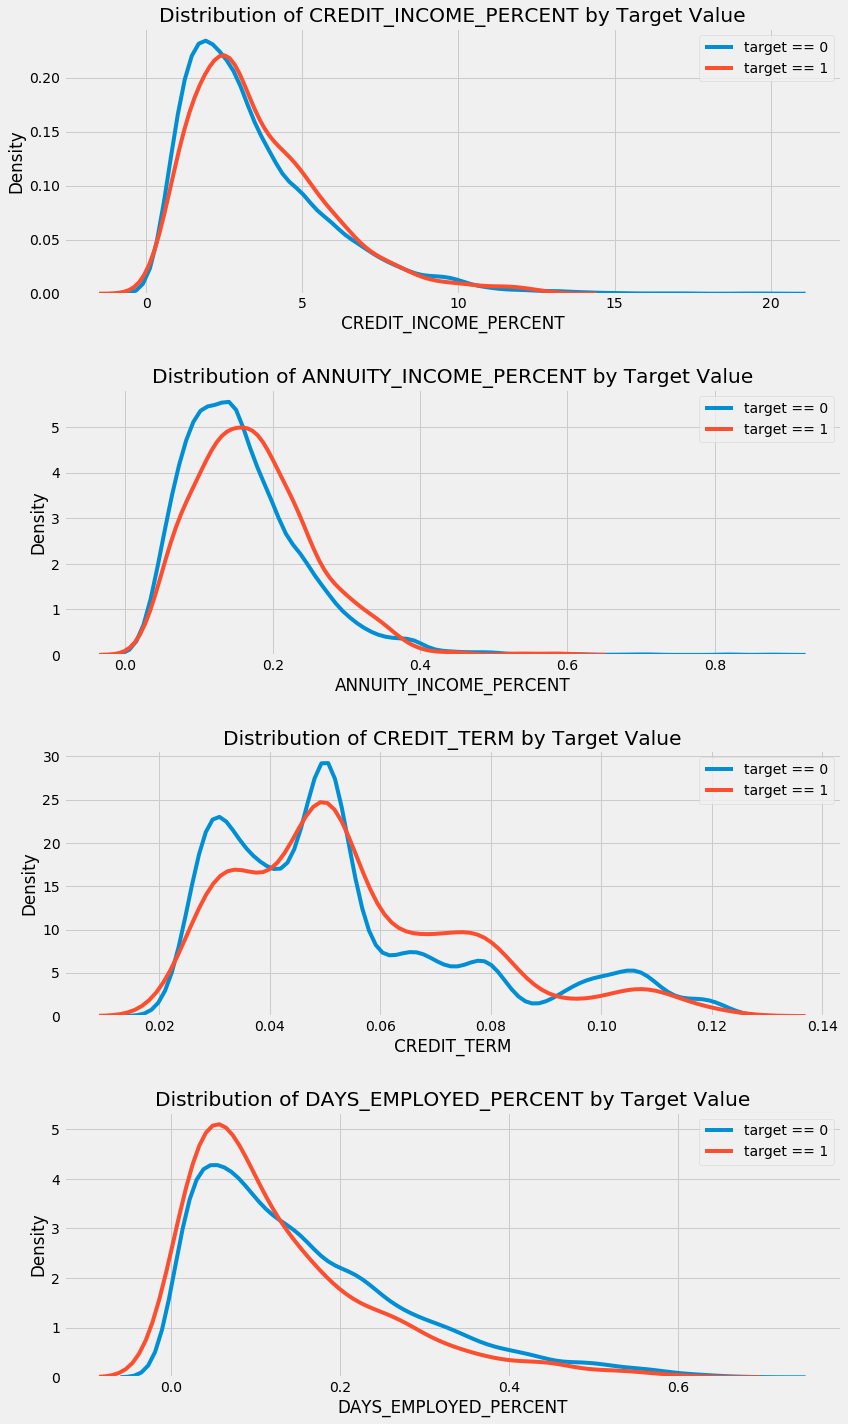

In [65]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [66]:
# app_test = app_test.dropna()

In [67]:
# weird = app_test[app_test.apply(lambda r: r.str.contains('No', case=False).any(), axis=1)] 



In [68]:
app_train2.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100002                   0             0                1   
1      100003                   0             0                0   
2      100004                   1             1                1   
3      100006                   0             0                1   
4      100007                   0             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   REGION_POPULATION_RELATIVE      ...       WALLSMATERIAL_MODE_Stone, brick  \
0                    0.018801      ...                                     1   
1                    0.003541      ...                                     0   
2                    0.010032      ...                                     0   
3                    0.008019      ...                                     0   
4                    0.028663      ...                                     0   

   WALLSMATERIAL_MODE_Wooden  EMERGENCYSTATE_MODE_No  EMERGENCYSTATE_MODE_Yes  \
0                          0                       1                        0   
1                          0                       1                        0   
2                          0                       0                        0   
3                          0                       0                        0   
4                          0                       0                        0   

   TARGET  DAYS_EMPLOYED_ANOM  EXT_SOURCE_1_2_3_PRODUCT  \
0       1               False                  0.003043   
1       0               False                       NaN   
2       0               False                       NaN   
3       0               False                       NaN   
4       0               False                       NaN   

   EXT_SOURCE_1_3_PRODUCT  EXT_SOURCE_1_3_ADD  INCOME_RATIO  
0                0.011573            0.222413      2.007889  
1                     NaN                 NaN      4.790750  
2                     NaN                 NaN      2.000000  
3                     NaN                 NaN      2.316167  
4                     NaN                 NaN      4.222222  

[5 rows x 244 columns]

In [69]:
app_train2.describe()

SK_ID_CURR  NAME_CONTRACT_TYPE   FLAG_OWN_CAR  FLAG_OWN_REALTY  \
count  307511.000000       307511.000000  307511.000000    307511.000000   
mean   278180.518577            0.095213       0.340108         0.693673   
std    102790.175348            0.293509       0.473746         0.460968   
min    100002.000000            0.000000       0.000000         0.000000   
25%    189145.500000            0.000000       0.000000         0.000000   
50%    278202.000000            0.000000       0.000000         1.000000   
75%    367142.500000            0.000000       1.000000         1.000000   
max    456255.000000            1.000000       1.000000         1.000000   

        CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  307511.000000      3.075110e+05  3.075110e+05  307499.000000   
mean        0.417052      1.687979e+05  5.990260e+05   27108.573909   
std         0.722121      2.371231e+05  4.024908e+05   14493.737315   
min         0.000000      2.565000e+04  4.500000e+04    1615.500000   
25%         0.000000      1.125000e+05  2.700000e+05   16524.000000   
50%         0.000000      1.471500e+05  5.135310e+05   24903.000000   
75%         1.000000      2.025000e+05  8.086500e+05   34596.000000   
max        19.000000      1.170000e+08  4.050000e+06  258025.500000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE      ...        \
count     3.072330e+05               307511.000000      ...         
mean      5.383962e+05                    0.020868      ...         
std       3.694465e+05                    0.013831      ...         
min       4.050000e+04                    0.000290      ...         
25%       2.385000e+05                    0.010006      ...         
50%       4.500000e+05                    0.018850      ...         
75%       6.795000e+05                    0.028663      ...         
max       4.050000e+06                    0.072508      ...         

       WALLSMATERIAL_MODE_Panel  WALLSMATERIAL_MODE_Stone, brick  \
count             307511.000000                    307511.000000   
mean                   0.214757                         0.210773   
std                    0.410654                         0.407858   
min                    0.000000                         0.000000   
25%                    0.000000                         0.000000   
50%                    0.000000                         0.000000   
75%                    0.000000                         0.000000   
max                    1.000000                         1.000000   

       WALLSMATERIAL_MODE_Wooden  EMERGENCYSTATE_MODE_No  \
count              307511.000000           307511.000000   
mean                    0.017437                0.518446   
std                     0.130892                0.499660   
min                     0.000000                0.000000   
25%                     0.000000                0.000000   
50%                     0.000000                1.000000   
75%                     0.000000                1.000000   
max                     1.000000                1.000000   

       EMERGENCYSTATE_MODE_Yes         TARGET  EXT_SOURCE_1_2_3_PRODUCT  \
count            307511.000000  307511.000000              1.095890e+05   
mean                  0.007570       0.080729              1.433152e-01   
std                   0.086679       0.272419              1.075977e-01   
min                   0.000000       0.000000              2.430332e-07   
25%                   0.000000       0.000000              5.610600e-02   
50%                   0.000000       0.000000              1.199324e-01   
75%                   0.000000       0.000000              2.101258e-01   
max                   1.000000       1.000000              6.185571e-01   

       EXT_SOURCE_1_3_PRODUCT  EXT_SOURCE_1_3_ADD   INCOME_RATIO  
count           109742.000000       109742.000000  307511.000000  
mean                 0.260041            1.004891       3.957570  
std                  0.159024   

checking app_train2 and app_test2 for feature inconsistencies

In [70]:
for col in app_train2:
    if col not in app_test2:
        print(col)

TARGET


In [71]:
from sklearn.preprocessing import MinMaxScaler, Imputer

train_labels = app_train2['TARGET']

# Drop the target from the training data
if 'TARGET' in app_train2:
    train = app_train2.drop(columns = ['TARGET'])
else:
    train = app_train2.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test2.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test)


# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 243)
Testing data shape:  (48744, 243)


In [72]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [73]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [74]:
# Submission dataframe
submit = app_test2[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


SK_ID_CURR    TARGET
0      100001  0.068276
1      100005  0.128044
2      100013  0.083204
3      100028  0.059150
4      100038  0.126399

In [75]:
# # Save the submission to a csv file
# submit.to_csv('log_reg_baseline.csv', index = False)

In [76]:
# reg_train = app_train2.dropna() # drop all NaN from the dataframe - not necessary if using Imputer below

In [ ]:
label = app_train2['TARGET']
reg_train = app_train2.drop(columns = ['TARGET', 'SK_ID_CURR']) # drop Target (ie label) and the ID columns
labels = [x for x in label] # removing from dataframe

In [79]:
for col in app_test2:
    if col not in reg_train:
        print(col)

SK_ID_CURR


In [80]:
from sklearn import preprocessing 
X_imputed=preprocessing.Imputer().fit_transform(reg_train) 
X_imputed.shape

(307511, 242)

# Support Vector Machines 

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import svm

# ten percent for testing
percent = len(X_imputed)/10
percent = -int(percent) # in case 10% isn't a whole number, make float into an integer

# Split the data into training/testing sets
X_train = X_imputed[:percent]
X_test = X_imputed[percent:]

# Split the labels into training/testing sets
y_train = labels[:percent]
y_test = labels[percent:]

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)



In [ ]:
y_predict = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

In [ ]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train ) 
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
dec = lin_clf.decision_function([[1]])
dec.shape[1]

ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

y_predict_probabilities = clf.predict(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# test_imputed = preprocessing.Imputer().fit_transform(app_test2)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

lr_predict_probabilities = lr_model.predict_proba(X_test)[:,1]

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_predict_probabilities)
lr_roc_auc = auc(lr_fpr, lr_tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='K-nearest Neighbours (area = %0.2f)' % roc_auc)
plt.plot(lr_fpr, lr_tpr, color='darkgreen',
         lw=2, label='Logistic Regression (area = %0.2f)' % lr_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# test_imputed.shape

In [ ]:
# y_predict = clf.predict(test_imputed)

In [ ]:
# print(clf.get_params())